In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from scipy.stats import skew, pearsonr
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, log_loss

In [38]:
df = pd.read_csv("./data/star_classification.csv")

In [39]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [40]:
df.shape

(100000, 18)

In [41]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


array([[<Axes: title={'center': 'obj_ID'}>,
        <Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'run_ID'}>,
        <Axes: title={'center': 'rerun_ID'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>],
       [<Axes: title={'center': 'spec_obj_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>],
       [<Axes: title={'center': 'fiber_ID'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

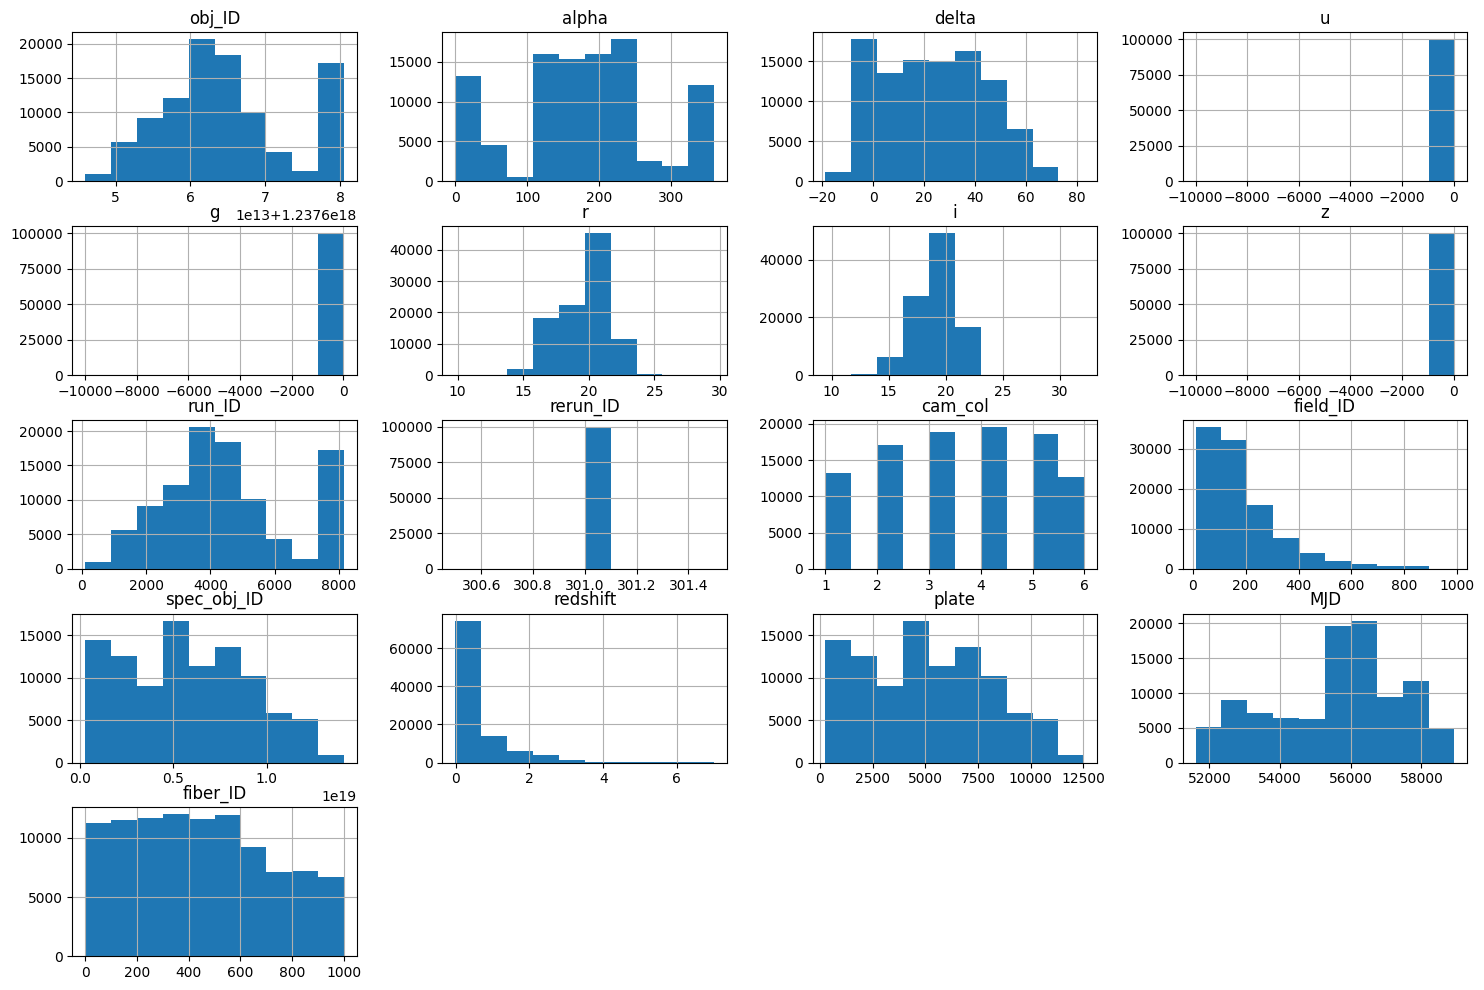

In [42]:
df.hist(figsize=(18,12))

In [43]:
len(df['obj_ID'].unique())

78053

<Axes: >

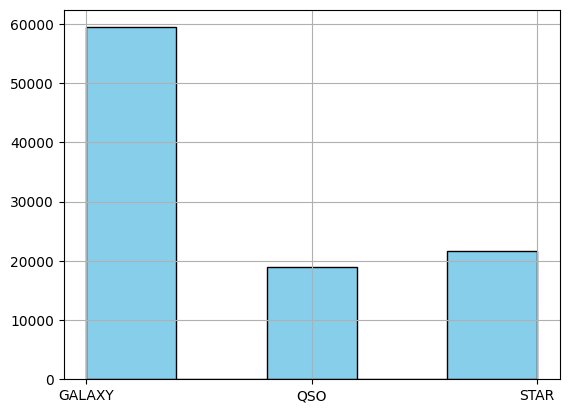

In [44]:
df['class'].hist(bins=5, color='skyblue', edgecolor='black')

-0.028510437789041283


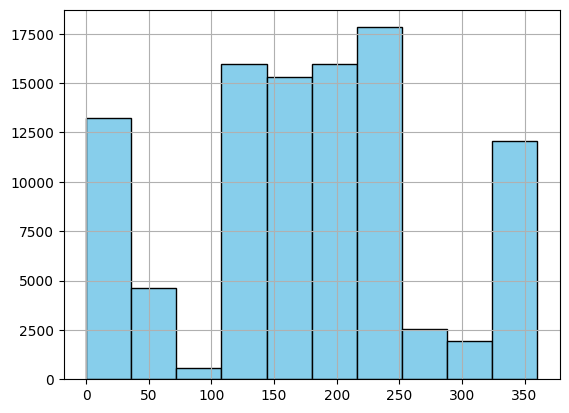

In [45]:
df['alpha'].hist(bins=10, color='skyblue', edgecolor='black')
# Calculate skewness
print(skew(df['alpha']))

0.17507593588620318


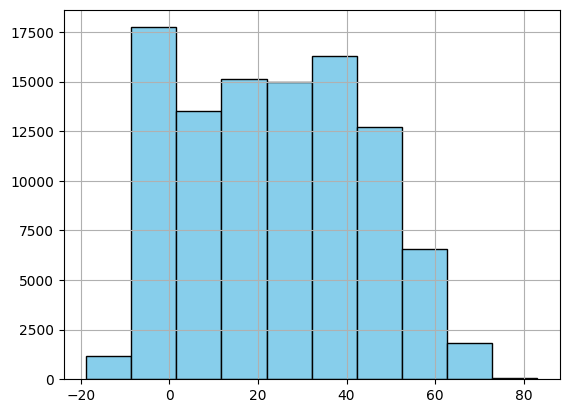

In [46]:
df['delta'].hist(bins=10, color='skyblue', edgecolor='black')
# Calculate skewness
print(skew(df['delta']))

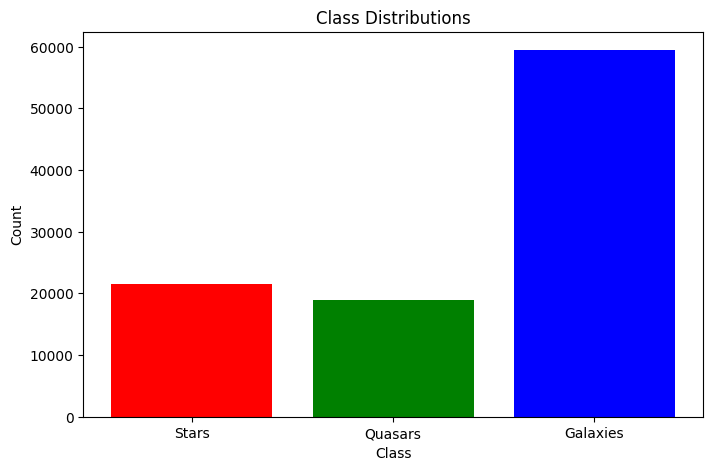

In [47]:
# Filter DataFrames
stars = df[df['class'] == "STAR"]
quasars = df[df['class'] == "QSO"]
galaxies = df[df['class'] == "GALAXY"]

# Calculate counts
stars_count = len(stars)
quasars_count = len(quasars)
galaxies_count = len(galaxies)

# Labels and values for the bar chart
labels = ['Stars', 'Quasars', 'Galaxies']
values = [stars_count, quasars_count, galaxies_count]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distributions')
plt.show()

In [48]:
quasars = df[df['class'] == "QSO"]
galaxies = df[df['class'] == "GALAXY"]
stars = df[df['class'] == "STAR"]

In [49]:
quasars.shape # Quasars have the least amount of samples for comparison

(18961, 18)

In [50]:
quasars = quasars[:18000]
galaxies = galaxies[:18000]
stars = stars[:18000]

In [51]:
print(quasars.shape)
print(galaxies.shape)
print(stars.shape)

(18000, 18)
(18000, 18)
(18000, 18)


In [52]:
# quasars to galaxies 
alpha_corr_q_g, _ = pearsonr(quasars['alpha'], galaxies['alpha'])
delta_corr_q_g, _ = pearsonr(quasars['delta'], galaxies['delta'])

# quasars to stars
alpha_corr_q_s, _ = pearsonr(quasars['alpha'], stars['alpha'])
delta_corr_q_s, _ = pearsonr(quasars['delta'], stars['delta'])

# galaxies to stars
alpha_corr_g_s, _ = pearsonr(galaxies['alpha'], stars['alpha'])
delta_corr_g_s, _ = pearsonr(galaxies['delta'], stars['delta'])

In [53]:
print(alpha_corr_q_g, delta_corr_q_g)
print(alpha_corr_q_s, delta_corr_q_s)
print(alpha_corr_g_s, delta_corr_g_s)

-0.0034423952146263696 0.021313903824757077
-0.008859388872241756 0.010861209774200827
-0.005017769477807839 0.0010810796541126835


In [54]:
df_numerical = df.drop(columns=['class'])
df_numerical.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


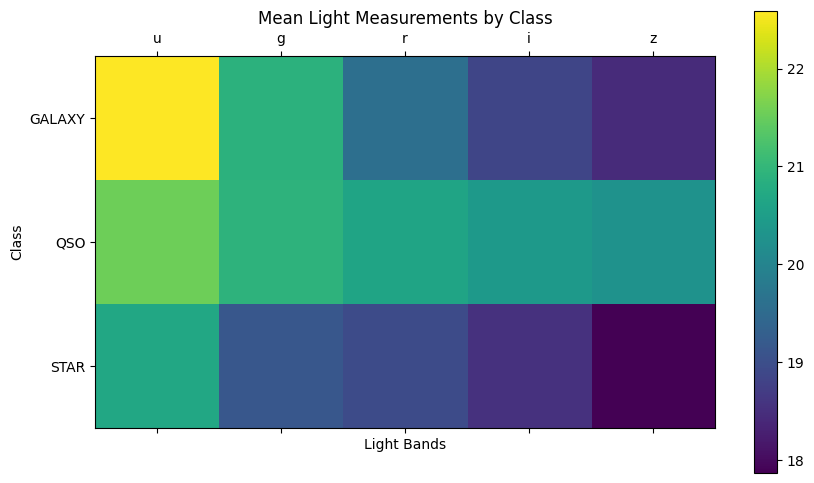

In [55]:
# Show the relationship of light against the classes
light_columns = ['u', 'g', 'r', 'i', 'z']
classes = df['class'].unique()
class_column = 'class'

# Calculate mean light values for each class
mean_values = df.groupby(class_column)[light_columns].mean()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(mean_values, cmap='viridis')

# Add colorbar
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(range(len(light_columns)))
ax.set_xticklabels(light_columns)
ax.set_yticks(range(len(classes)))
ax.set_yticklabels(classes)

ax.set_title('Mean Light Measurements by Class')
plt.xlabel('Light Bands')
plt.ylabel('Class')
plt.show()

Text(0, 0.5, 'Mean Redshift')

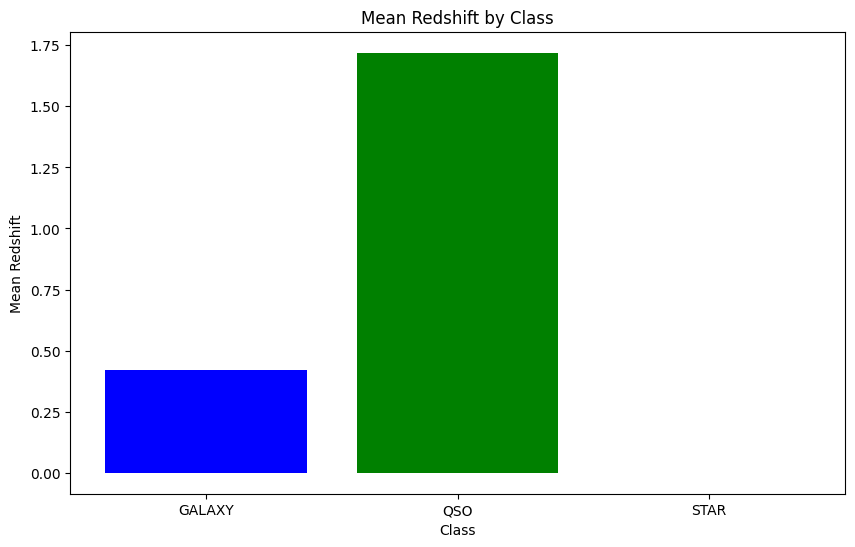

In [56]:
mean_values = df.groupby('class')['redshift'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(mean_values['class'], mean_values['redshift'], color=['blue', 'green', 'red'])
plt.title('Mean Redshift by Class')
plt.xlabel('Class')
plt.ylabel('Mean Redshift')

2.5235684767813495

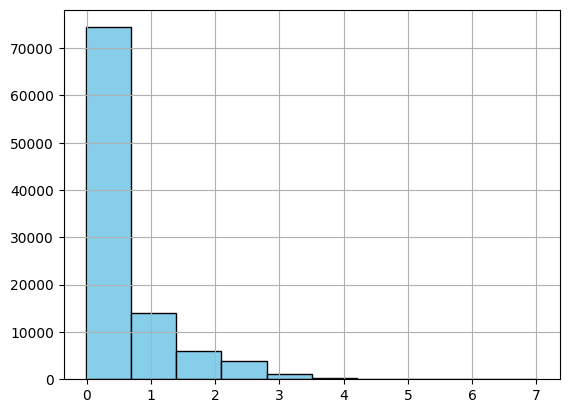

In [57]:
df['redshift'].hist(bins=10, color='skyblue', edgecolor='black')
# Calculate skewness
skew(df['redshift'])

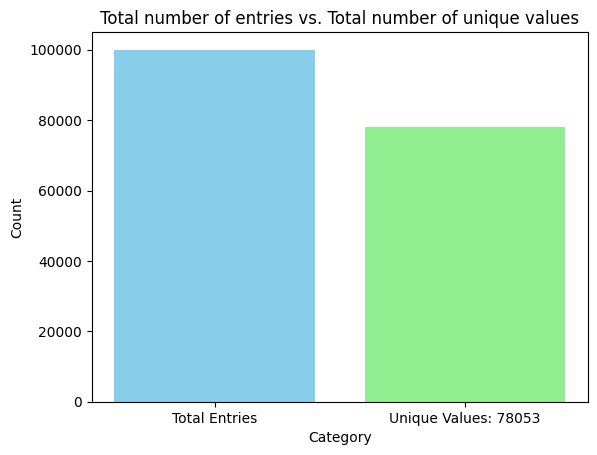

In [58]:
unique_values_count = df['obj_ID'].nunique()
total_entries = len(df)
labels = ['Total Entries', f"Unique Values: {unique_values_count}"]
values = [total_entries, unique_values_count]

plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Total number of entries vs. Total number of unique values')
plt.show()

In [59]:
# Data pre-processing

In [60]:
# The same object is identified multiple times with different feature values
len(df[df['obj_ID'].duplicated() == True])

21947

In [61]:
# It appears that the same object can have multiple entries with different feature values
df[df.duplicated() == True].count()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [62]:
# Same object with different classifications?
# Find duplicates
duplicates = df[df['obj_ID'].duplicated(keep=False)]

# Group by obj_ID and check if the class has more than one unique value
duplicate_classes = duplicates.groupby('obj_ID')['class'].nunique()

# Filter object IDs where there are multiple unique classes
obj_ids_with_multiple_classes = duplicate_classes[duplicate_classes > 1].index

# Get rows with these object IDs
df[df['obj_ID'].isin(obj_ids_with_multiple_classes)]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
16,1.237679e+18,353.201522,3.080796,24.54890,21.44267,20.95315,20.79360,20.48442,7712,301,5,284,4.822278e+18,STAR,-0.000429,4283,55864,178
17,1.237679e+18,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,7712,301,5,339,9.843824e+18,QSO,2.031528,8743,57663,295
21,1.237658e+18,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,2821,301,2,28,8.237292e+18,STAR,-0.000120,7316,56710,756
23,1.237658e+18,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2821,301,2,33,8.228240e+18,QSO,2.075680,7308,56709,596
40,1.237662e+18,181.645331,42.273995,21.20149,19.77107,19.27176,19.04226,18.94410,3893,301,3,158,9.437546e+18,STAR,0.000048,8382,57513,919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99938,1.237680e+18,355.179454,27.714932,21.50280,21.59604,21.42026,21.01734,20.47349,8103,301,5,67,8.667300e+18,QSO,1.794403,7698,58013,444
99939,1.237680e+18,355.651889,27.734322,24.87293,20.71855,19.83588,19.54439,19.43266,8103,301,5,70,7.336558e+18,STAR,-0.000778,6516,56571,706
99949,1.237679e+18,34.602921,31.514091,22.45167,21.19384,20.60153,20.56568,20.14365,7781,301,4,148,8.712484e+18,QSO,2.418509,7738,58100,985
99961,1.237655e+18,134.347759,47.771911,24.17897,22.89025,21.26451,20.94941,19.87500,2243,301,4,128,8.458979e+18,QSO,0.219966,7513,56780,339


In [63]:
# Check for na values
df[df.isna()].count()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [64]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [65]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [66]:
# Conversions?
"""
All columns except for our y target column (class) are numerical types which will make processing and creating our pipelines
much easier.

The current number of features is a relatively small amount and should all be considered when building our pipeline. Each
feature offers some significance in either identifying the classification or reinforcing our understanding of the class.
"""

'\nAll columns except for our y target column (class) are numerical types which will make processing and creating our pipelines\nmuch easier.\n\nThe current number of features is a relatively small amount and should all be considered when building our pipeline. Each\nfeature offers some significance in either identifying the classification or reinforcing our understanding of the class.\n'

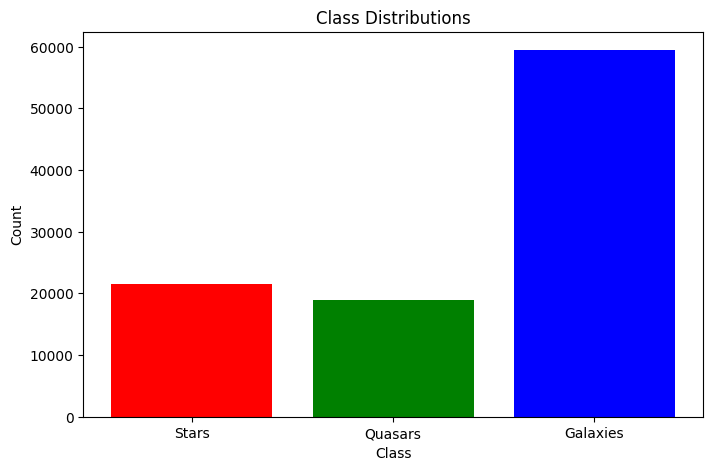

In [67]:
# Filter DataFrames
stars = df[df['class'] == "STAR"]
quasars = df[df['class'] == "QSO"]
galaxies = df[df['class'] == "GALAXY"]

# Calculate counts
stars_count = len(stars)
quasars_count = len(quasars)
galaxies_count = len(galaxies)

# Labels and values for the bar chart
labels = ['Stars', 'Quasars', 'Galaxies']
values = [stars_count, quasars_count, galaxies_count]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distributions')
plt.show()

In [68]:
# Before
print(df['class'].value_counts())

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


In [69]:
# SMOTE
X = df.drop(columns='class')
y = df['class']

strategy = {'STAR': 35000, 'QSO': 35000, 'GALAXY': 60000}

smote = SMOTE(sampling_strategy=strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['class'] = y_resampled

# After
df_resampled['class'].value_counts()

class
GALAXY    60000
QSO       35000
STAR      35000
Name: count, dtype: int64

In [70]:
df_resampled.shape

(130000, 18)

In [71]:
# Implementation
X = df_resampled.drop(columns='class')
y = df_resampled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [79]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Bring in the first classifier, SVM
svc = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

svc_params = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__class_weight': ['balanced'],
    'svc__gamma': ['auto'],
    'svc__cache_size': [500]
}

knn_params = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Define log loss scorer
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

grid_search_svc = GridSearchCV(svc, param_grid=svc_params, scoring=log_loss_scorer, cv=2)
grid_search_knn = GridSearchCV(knn, param_grid=knn_params, scoring=log_loss_scorer, cv=2)

grid_search_svc.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)

C:\Users\tmcin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__leaf_size': [10, 20, 30, 40,
                                                             50],
                         'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11,
                                                               13],
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring=make_scorer(log_loss, greater_is_better=False, response_method='predict_proba'))

In [80]:
svc_best_log_loss = -grid_search_svc.best_score_
knn_best_log_loss = -grid_search_knn.best_score_

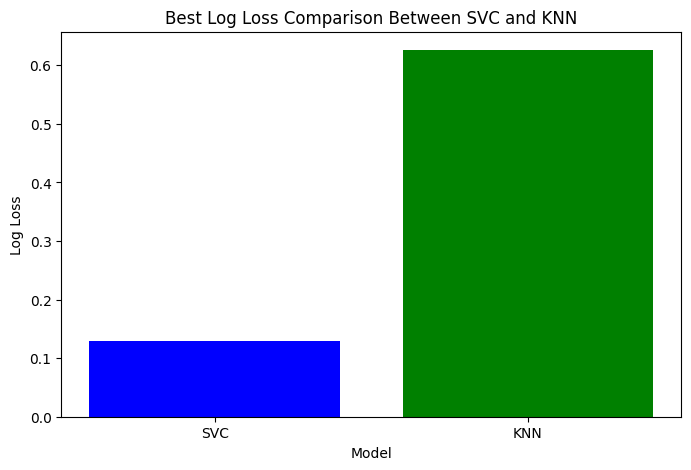

In [108]:
# Plot log loss for SVC and KNN
models = ['SVC', 'KNN']
log_losses = [svc_best_log_loss, knn_best_log_loss]

plt.figure(figsize=(8, 5))
plt.bar(models, log_losses, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Best Log Loss Comparison Between SVC and KNN')
plt.show()

In [110]:
print(f"{svc_best_log_loss * 100:.2f}")
print(f"{knn_best_log_loss * 100:.2f}")

12.93
62.61


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract results from GridSearchCV
svc_results = grid_search_svc.cv_results_
knn_results = grid_search_knn.cv_results_

# Collect the mean and std of log loss
svc_mean_score = svc_results['mean_test_score']
svc_std_score = svc_results['std_test_score']
knn_mean_score = knn_results['mean_test_score']
knn_std_score = knn_results['std_test_score']

# Extract parameter combinations
svc_params = svc_results['params']
knn_params = knn_results['params']

# Convert to DataFrame for easier plotting
svc_df = pd.DataFrame(svc_params)
svc_df['mean_test_score'] = svc_mean_score
svc_df['std_test_score'] = svc_std_score

knn_df = pd.DataFrame(knn_params)
knn_df['mean_test_score'] = knn_mean_score
knn_df['std_test_score'] = knn_std_score


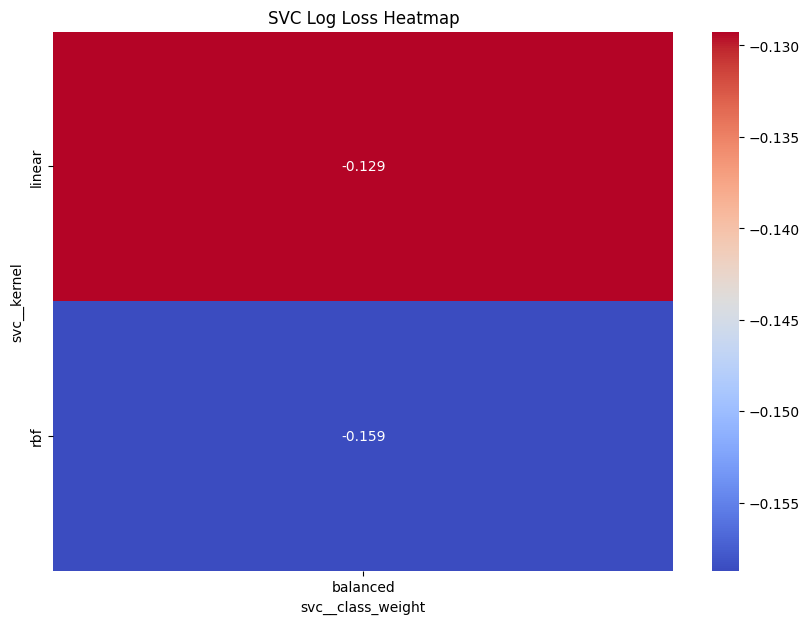

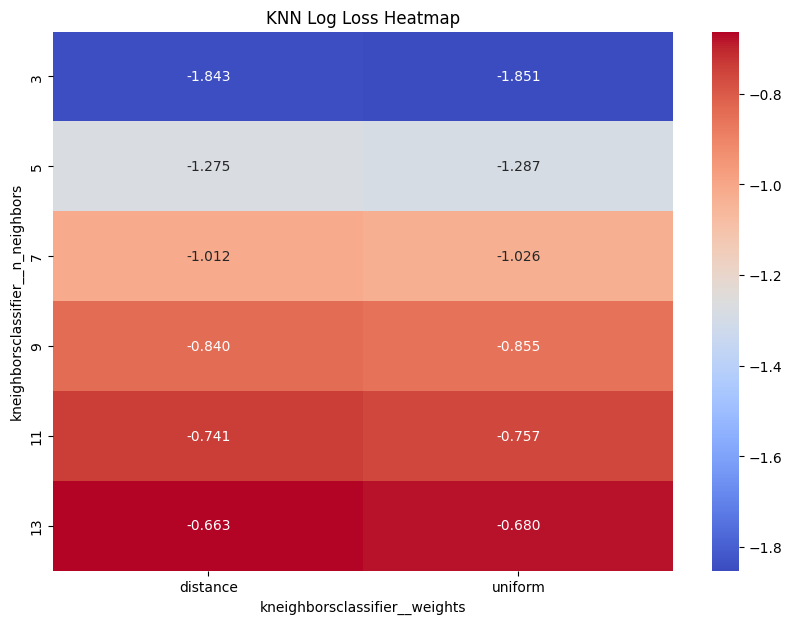

In [112]:
import seaborn as sns

# SVC Heatmap
svc_heatmap_data = svc_df.pivot_table(index='svc__kernel', columns='svc__class_weight', values='mean_test_score')
plt.figure(figsize=(10, 7))
sns.heatmap(svc_heatmap_data, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('SVC Log Loss Heatmap')
plt.show()

# KNN Heatmap
knn_heatmap_data = knn_df.pivot_table(index='kneighborsclassifier__n_neighbors', columns='kneighborsclassifier__weights', values='mean_test_score')
plt.figure(figsize=(10, 7))
sns.heatmap(knn_heatmap_data, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('KNN Log Loss Heatmap')
plt.show()